# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [48]:
## LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import ipywidgets as widgets
from beakerx import *

warnings.filterwarnings('ignore')
%matplotlib inline


In [49]:
# Your work here.

df = pd.read_csv('data/human_body_temperature.csv')


In [50]:
df.head()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [52]:
df.describe().T

### Q1 Is the distribution of body temperatures normal?

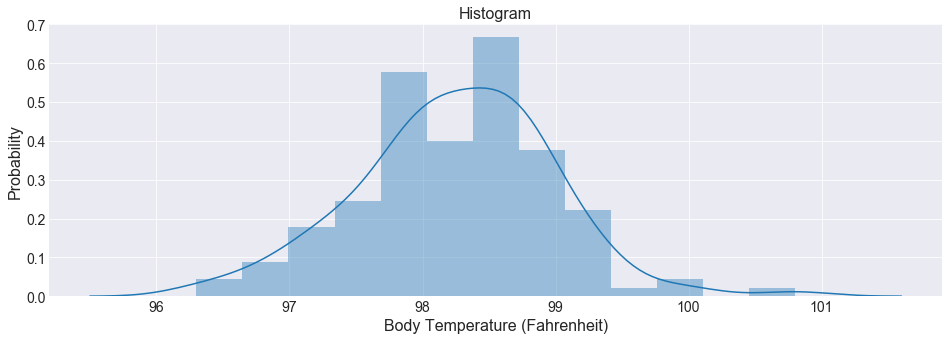

In [53]:
plt.subplots(figsize=(16,5))
ax = sns.distplot(df.temperature)
plt.xlabel('Body Temperature (Fahrenheit)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title ('Histogram', fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)
sns.set_style('darkgrid')

### A1
<p style="color:red"> Graphical methods are used to check __Normality__ first, but on the other hand there are also __other methods__ to check the normality</p> The data seems to come from __a normal distribution.__

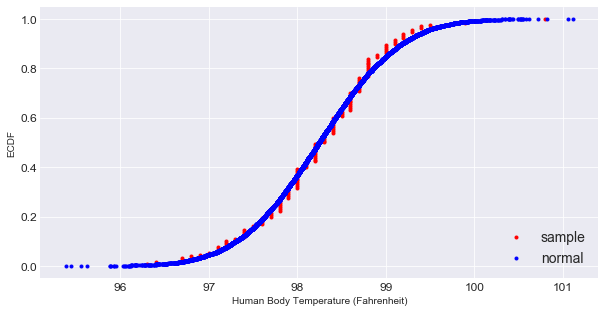

In [54]:
# ECDF Function


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1.0, n+1) / n
    
    return x, y


mu = np.mean(df.temperature)
sigma = np.std(df.temperature)


# Sample out of Normal Distribution with existing dataset's mu and sigma 
np.random.seed(42)
sample = np.random.normal(mu, sigma, 10000)

# Plotting ECDF both for normal and sample dataset
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(sample)

_ = plt.subplots(figsize = (10,5))

_ = plt.plot(x, y, marker='.', linestyle='none', color='r')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none', color='b')

_ = plt.xlabel('Human Body Temperature (Fahrenheit)')
_ = plt.ylabel('ECDF')
_ = plt.xticks(size=12)
_ = plt.yticks(size=12)
_ = plt.legend(['sample', 'normal'], loc='lower right', fontsize= 14)
plt.show()

### A1
<p style="color:red"> When the ECDF plots are checked the data, simulated sample created by mu and sigma of the data fits each other</p> The data seems to come from __a normal distribution.__

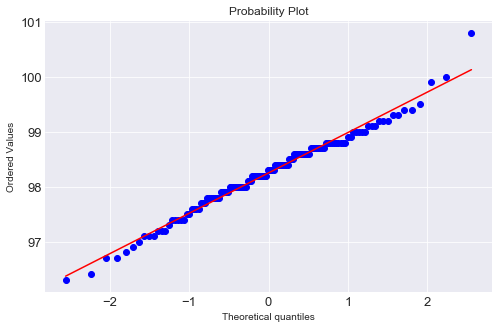

In [82]:
from scipy import stats

_ = plt.subplots(figsize=(8,5))
_ = stats.probplot(df.temperature, dist='norm', plot=plt)
_ = plt.xticks(size = 13)
_ = plt.yticks(size = 13)
plt.show()

In [83]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

### A1


<p style="color:red"> H0 : The temperature data come from Normal Distribution (for p = 0.05). </p>
<p style="color:black"> The p value is __0.258__ and greater than __0.05__ so that we can __not reject H0 Null__ hypotesis.</p> The data seems to come from __a normal distribution.__

## Q2. Is the sample size large? Are the observations independent? 


In [85]:
len(df.temperature)

130

<p style="color:red"> Our sample size is __large (n = 130)__, as it is __greater than 30__, which is defined by Central Limit Theorem. Assuming the observations are __independent__ because collected from diffrent people, we can invoke the central limit theorem and say that the sample mean will be approximately __a normal distribution__.</p>

## Q3. Is the true population mean really 98.6 degrees F?

### Q3 A. First, try a bootstrap hypothesis test.


In [93]:

## H0 : mu is 98.6
## HA : mu is not 98.6

bs_replicates = np.empty(10000)

for i in range(10000):
    
    # Generate bootstrap
    bs_sample = np.random.choice(df.temperature, size=len(df.temperature))
    
    # Compute replicate
    bs_replicates[i] = np.mean(bs_sample)

# Define p value
p_value = np.sum(bs_replicates >= 98.6)/len(bs_replicates)

print ('p_value : ', p_value)

p_value :  0.0


<p style="color:red"> p value is 0, less than 0.05 so H0 Null Hypothesis can be rejected.</p>

### Q3 B. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

__One-sample test__ is supposed to be used for this data set, because we have __only temperature data__, we don't have any second data set.

### Q3 C. In this situation, is it appropriate to use the  t  or  z  statistic?

Since the data is __normally distributed__ and __standard deviation is not given__, we have to use the __t statistic.__

The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.



In [96]:
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


In [97]:
# conduct hypothesis test for t-score
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")
else:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - cannot be rejected")

The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


### Q4 Draw a small sample of size 10 from the data and repeat both frequentist tests.  Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the  t  and  z statistic?


In [98]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)

In [105]:
# conduct one-sample t-test
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -0.10388150415957198
p value = 0.9195414626869918


In [106]:
# CURIOUS TEST: conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -0.103881504159572
p value = 0.9172633852273995


For both tests, p-values are __greater than 0.05__ so that we can __accept__ the null hypothesis.

These values are so variable related to the different samples. z-test has a greater p value compared to t-test. So __t-test is more reliable__ in this data set

### Q5 At what temperature should we consider someone's temperature to be "abnormal"?

-As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

-Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [115]:
# bootstrap approach
temperature_shifted = df.temperature.values - np.mean(df.temperature) + 98.6

def draw_bs_reps(data, size=1):
    n = len(data)
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = np.mean(np.random.choice(data, n))
    
    return bs_reps

bs_replicates = draw_bs_reps(temperature_shifted,  10000)

np.percentile(bs_replicates,[2.5,97.5])

array([98.47230769, 98.72309615])

In [110]:
Mu, StD, NSie = df.temperature.mean(), df.temperature.std(), len(df.temperature)
sampleError = stats.sem(df.temperature)
CI = stats.norm.interval(0.95, Mu, sampleError)
print ('Sample mean:             {Mu:0.2f}\n'
       'Sample variance:         {v:0.3f}\n'
       'Sample margin of error:  {sem:0.4f}\n'
       '95% confidence interval: {CI}'
       .format(Mu=Mu, v=StD**2, sem=sampleError, CI=CI))

Sample mean:             98.25
Sample variance:         0.538
Sample margin of error:  0.0643
95% confidence interval: (98.12319642818166, 98.3752651102799)


In [111]:
stats.t.interval(.95,len(df.temperature)-1,Mu,sampleError)

(98.12200290560804, 98.37645863285351)

Abnormal temperatures would be __below 98.12__ and __above 98.37__

### Q6 Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [126]:
# get male and female temperature scores

male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

print ('male mean temperature   :', np.mean(male_temps))
print ('female mean temperature :', np.mean(female_temps))

male mean temperature   : 98.1046153846154
female mean temperature : 98.39384615384613



### TWO SAMPLE T-TEST 

In [129]:
## We will use two-sample test because we compare two different quantities
## We will use t test because population standart deviation is not known



from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)


t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [131]:
# conduct hypothesis test# 

## alpha will be 0.25 due to two side test

alpha = 0.05
if p_val_t < alpha/2:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


### BOOTSTRAP

In [132]:
diff_of_temps = df[df.gender == 'M'].temperature.mean() - df[df.gender == 'F'].temperature.mean()


def draw_bs_reps_2(data1, data2, size):
    
    
    bs_reps = np.empty(size)
    concat_temp = np.concatenate((data1,data2))
    for i in range(size):
        tempStaff = np.random.permutation(concat_temp)
        bs_x, bs_y = tempStaff[len(data1):], tempStaff[:len(data1)]
        bs_reps[i] = np.mean(bs_x) - np.mean(bs_y)
    
    return bs_reps

bs_replicates = draw_bs_reps_2(male_temps, female_temps, 10000)

p = np.sum(bs_replicates <= diff_of_temps) / len(bs_replicates)
print('p-value :'+str(p))


p-value :0.0095


Alpha level is .05, it will drop to .025 because it is a 2 side testing.

So Looking at the p, I could say that we can __reject the null Hypothesis__ since p-value (.0095) is __lower than__ level of Alpha.

This means that the there is a significant difference between males and females in normal temperature

## Analysis Conclusion:
